In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
from sklearn.datasets import load_breast_cancer
dataset= load_breast_cancer()
features= dataset.data
classes= dataset.target

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(features, classes,test_size= 0.3, random_state=44, shuffle= True)

In [4]:
print(X_train.shape)
print(X_test.shape)

(398, 30)
(171, 30)


In [5]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l2',  C=0.01, random_state=44, solver='lbfgs', max_iter=50, n_jobs=None)
lr.fit(X_train, y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))
print('============================')
y_pred= lr.predict(X_test)
print(y_test[:15])
print('============================')
print(y_pred[:15])
print('============================')
y_prob= lr.predict_proba(X_test)
print(y_prob[:15])
pred = y_prob[:,1]


0.9221105527638191
0.9707602339181286
[0 0 1 0 1 1 1 1 0 1 0 1 0 0 1]
[0 0 1 0 1 1 1 1 0 1 1 1 0 0 1]
[[9.78464800e-01 2.15352005e-02]
 [9.99982430e-01 1.75697847e-05]
 [8.89915383e-02 9.11008462e-01]
 [9.99999871e-01 1.29350515e-07]
 [4.72541202e-01 5.27458798e-01]
 [3.26553283e-01 6.73446717e-01]
 [1.25892060e-02 9.87410794e-01]
 [2.40756524e-01 7.59243476e-01]
 [9.57852345e-01 4.21476547e-02]
 [1.56553798e-02 9.84344620e-01]
 [3.53701373e-02 9.64629863e-01]
 [8.16893902e-02 9.18310610e-01]
 [9.88195115e-01 1.18048853e-02]
 [6.88821601e-01 3.11178399e-01]
 [1.18861758e-02 9.88113824e-01]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [6]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[ 59,   4],
       [  1, 107]])

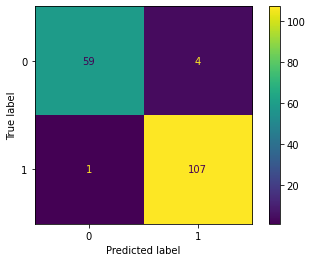

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)
disp.plot()

In [8]:
from sklearn.metrics import classification_report
metric= classification_report (y_test, y_pred)
print(metric)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [9]:
from sklearn.metrics import zero_one_loss
zeroloss= zero_one_loss(y_test, y_pred)
print(zeroloss)

0.0292397660818714


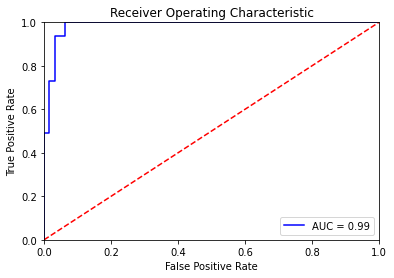

In [10]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold= roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Logistic Regression & Kfolds**

In [32]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target


In [33]:
X.shape

(150, 4)

In [34]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 3)
for train,test in skf.split(X,y):
    x_train = X[train]
    x_test = X[test]
    y_train = y[train]
    y_test = y[test]


In [36]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l2', C= 0.9, random_state=33, solver='lbfgs', max_iter=100)
lr.fit(x_train,y_train)
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))
print(y_test[:30])
pred= lr.predict_proba(x_test)
y_pred= lr.predict(x_test)
print(y_pred[:30])

0.99
0.98
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        17
           2       0.94      1.00      0.97        17

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



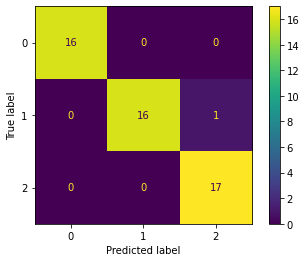

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
metric= classification_report(y_test, y_pred)
print(metric)
cm= confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)
disp.plot()

# **SGD Classifier**

In [39]:
from sklearn.datasets import load_breast_cancer
cancer= load_breast_cancer()
X= cancer.data
y= cancer.target


In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3, random_state= 33, shuffle= True)

In [46]:
from sklearn.linear_model import SGDClassifier
SGD= SGDClassifier(penalty='l2', alpha=0.001, random_state= 33)
SGD.fit(X_train,y_train)
print(SGD.score(X_train,y_train))
print(SGD.score(X_test, y_test))
print(y_test[:30])
y_pred= SGD.predict(X_test)
print(y_pred[:30])



0.9020100502512562
0.8538011695906432
[0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1]
[0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1]


              precision    recall  f1-score   support

           0       1.00      0.62      0.77        66
           1       0.81      1.00      0.89       105

    accuracy                           0.85       171
   macro avg       0.90      0.81      0.83       171
weighted avg       0.88      0.85      0.84       171



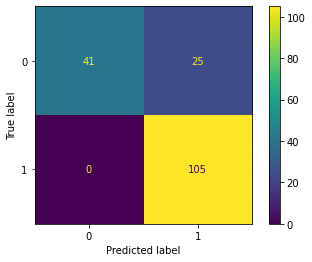

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report,confusion_matrix
import matplotlib.pyplot as plt

metric=classification_report(y_test, y_pred)
print(metric)
cm= confusion_matrix(y_test, y_pred)
disp= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=None)
disp.plot()